# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. GBDT (xgboost/lightgbm) </h1>

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Normalizer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import pickle
from tqdm import tqdm
import os
from collections import Counter

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from scipy import sparse

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
data_path = '/content/gdrive/My Drive/Applied AI Course Live/Assignments/8. Apply Naive Bayes on Donors Choose dataset/preprocessed_data.csv'
glove_path = '/content/gdrive/My Drive/Applied AI Course Live/Assignments/13. Apply GBDT on Donors Choose dataset/glove_vectors'

In [8]:
import pickle
with open(glove_path, 'rb') as f:
  model = pickle.load(f)
  glove_words = set(model.keys())

## 1.1 Loading Data

In [9]:
import pandas
data = pandas.read_csv(data_path,nrows = 50000)


In [14]:
X = data.drop(['project_is_approved'],axis=1)
essay = data['essay'].values
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<center>sentiment Score of eassay</center>

In [17]:
sid = SentimentIntensityAnalyzer()
essay_neg = []
essay_neu = []
essay_pos = []
essay_com = []
for sentiment in data['essay']:
  ss = sid.polarity_scores(sentiment)
  for k in ss:
    if k == 'neg':
      essay_neg.append(ss[k])
    elif k == 'neu':
      essay_neu.append(ss[k])
    elif k == 'pos':
      essay_pos.append(ss[k])
    else:
      essay_com.append(ss[k])

In [18]:
data['essay_neg'] = essay_neg
data['essay_neu'] = essay_neu
data['essay_pos'] = essay_pos
data['essay_com'] = essay_com

In [22]:
X = data
Y = data['project_is_approved'].values

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [23]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.33, stratify=Y)
print(X_train.shape)
print(X_test.shape)

(33500, 13)
(16500, 13)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

# Text

In [24]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#Encoding Essay using  and TFIDF

Vect_TFIDF = TfidfVectorizer(min_df=10)
Vect_TFIDF.fit(X_train['essay'])

train_essay_tfidf = Vect_TFIDF.transform(X_train['essay'])
test_essay_tfidf = Vect_TFIDF.transform(X_test['essay'])

print(train_essay_tfidf.shape)
print(test_essay_tfidf.shape)

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

(33500, 10370)
(16500, 10370)


In [25]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v_vectors(tfidf_words,essay):
  tfidf_w2v_vector = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(essay): # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vector.append(vector)
  return tfidf_w2v_vector
X_train_essay_tfidf_w2v=tfidf_w2v_vectors(tfidf_words,X_train['essay'])
X_test_essay_tfidf_w2v=tfidf_w2v_vectors(tfidf_words,X_test['essay'])


100%|██████████| 16500/16500 [00:32<00:00, 502.01it/s]


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

# Numerical

In [26]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1)) 
x_train_price_normalized = normalizer.transform(X_train['price'].values.reshape(1, -1)).reshape(-1,1)
x_test_price_normalized  = normalizer.transform(X_test['price'].values.reshape(1, -1)).reshape(-1,1)
x_train_price_normalized.shape

normali = Normalizer()
normali.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) 
x_train_teacher_number = normali.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1,1)
x_test_teacher_number  = normali.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)).reshape(-1,1)
x_test_teacher_number.shape

x_train_price_normalized.shape


(33500, 1)

# Categorical : Response Coding

In [27]:
# From Cancer diagnosis case study.
def get_fea_dict(alpha,feature,df):
  value_count = df[feature].value_counts()
  fea_dict = dict()
  for i, denominator in value_count.items():
    vec=[]
    for k in range(0,2):
      cls_cnt = df.loc[(df['project_is_approved'] == k) & (df[feature] == i)]
      vec.append((cls_cnt.shape[0] + alpha * 10) / (denominator + alpha * 20))
    fea_dict[i] = vec
  return fea_dict
  

def get_feature(alpha,feature,df):
  feature_dict = get_fea_dict(alpha,feature,X_train)
  value_count = X_train[feature].value_counts()
  fea_v=[]
  for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            fea_v.append(feature_dict[row[feature]])
        else:
            fea_v.append([1/2,1/2])

  return fea_v 

In [28]:
# Encoding categorical features: school_state,teacher_prefix,project_grade_category,clean_categories,clean_subcategories	
# alpha is used for laplace smoothing
alpha = 1
# train  feature
train_school_state = np.array(get_feature(alpha, 'school_state', X_train))
train_school_state=sparse.csr_matrix(train_school_state)
# test  feature
test_school_state = np.array(get_feature(alpha, 'school_state', X_test))
test_school_state=sparse.csr_matrix(test_school_state)

In [29]:
alpha = 1
# train  feature
train_teacher_prefix = np.array(get_feature(alpha, 'teacher_prefix', X_train))
train_teacher_prefix=sparse.csr_matrix(train_teacher_prefix)
# test  feature
test_teacher_prefix = np.array(get_feature(alpha, 'teacher_prefix', X_test))
test_teacher_prefix=sparse.csr_matrix(test_teacher_prefix)


# train  feature
train_project_grade_category = np.array(get_feature(alpha, 'project_grade_category', X_train))
train_project_grade_category=sparse.csr_matrix(train_project_grade_category)
# test  feature
test_project_grade_category = np.array(get_feature(alpha, 'project_grade_category', X_test))
test_project_grade_category=sparse.csr_matrix(test_project_grade_category)


# train  feature
train_clean_categories = np.array(get_feature(alpha, 'clean_categories', X_train))
train_clean_categories=sparse.csr_matrix(train_clean_categories)
# test  feature
test_clean_categories = np.array(get_feature(alpha, 'clean_categories', X_test))
test_clean_categories=sparse.csr_matrix(test_clean_categories)



# train  feature
train_clean_subcategories = np.array(get_feature(alpha, 'clean_subcategories', X_train))
train_clean_subcategories=sparse.csr_matrix(train_clean_subcategories)
# test  feature
test_clean_subcategories = np.array(get_feature(alpha, 'clean_subcategories', X_test))
test_clean_subcategories=sparse.csr_matrix(test_clean_subcategories)

# Stacking all features.

In [30]:
from scipy.sparse import hstack

X_train_merge = hstack((x_train_price_normalized,x_train_teacher_number,train_school_state,train_teacher_prefix,train_project_grade_category,train_clean_categories,train_clean_subcategories)).tocsr()
X_test_merge  = hstack((x_test_price_normalized,x_test_teacher_number,test_school_state,test_teacher_prefix,test_project_grade_category,test_clean_categories,test_clean_subcategories)).tocsr()

In [31]:
X_train_TFIDF = hstack((X_train_merge,train_essay_tfidf)).tocsr()
X_test_TFIDF  = hstack((X_test_merge,test_essay_tfidf)).tocsr()

X_train_tfidf_w2v = hstack((X_train_merge,X_train_essay_tfidf_w2v)).tocsr()
X_test_tfidf_w2v  = hstack((X_test_merge,X_test_essay_tfidf_w2v)).tocsr()



<h2>1.5 Applying Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [32]:
from xgboost import XGBClassifier

In [34]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
clf = XGBClassifier()
parameters = { 'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , 'n_estimators':[5,10,50, 75, 100] }

clf = GridSearchCV(clf,  parameters,  cv=3, scoring='roc_auc',  return_train_score=True)

clf.fit(X_train_TFIDF,Y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']

bestscore = clf.best_score_
results = pd.DataFrame.from_dict(clf.cv_results_)


In [35]:
print(clf.best_params_)
print(bestscore)

{'learning_rate': 0.2, 'n_estimators': 100}
0.7163353149589898


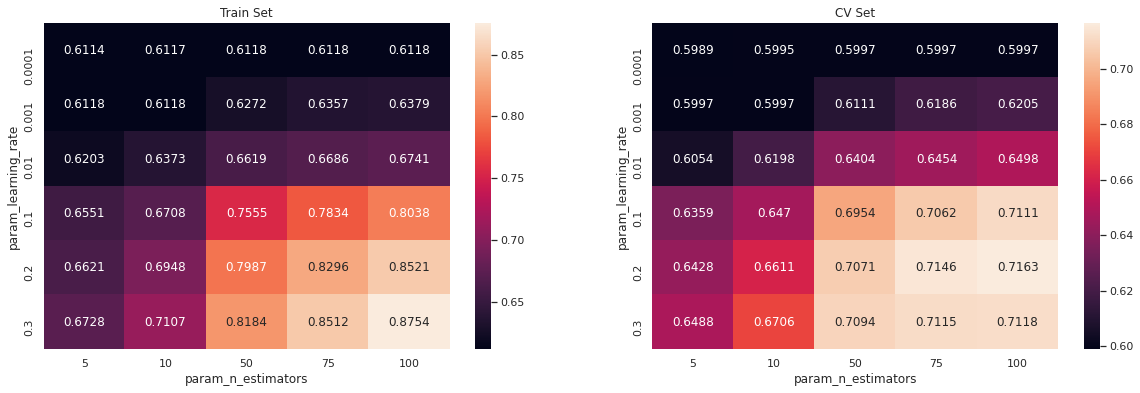

In [36]:
import pandas as pd
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_learning_rate','param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

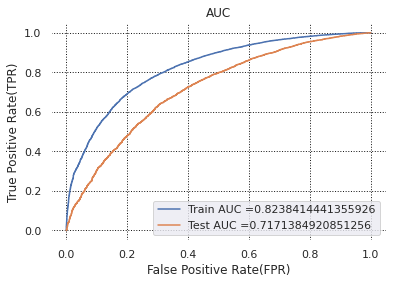

In [38]:

from sklearn.metrics import roc_curve,auc


clf1= XGBClassifier(learning_rate = 0.2, n_estimators= 100)
clf1.fit(X_train_TFIDF,Y_train)

y_pred_train = clf1.predict_proba(X_train_TFIDF)[ :,1]
y_pred_test = clf1.predict_proba(X_test_TFIDF)[ :,1]


train_fpr, train_tpr, train_threshold = roc_curve(Y_train, y_pred_train)
test_fpr, test_tpr, test_threshold = roc_curve(Y_test, y_pred_test)

ax = plt.subplot()

auc_train1 = auc(train_fpr,train_tpr)
auc_test1 = auc(test_fpr,test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()
#print(y_pred_train)

In [39]:
def pred_op(probability, threshold, fpr, tpr):
  t = threshold[np.argmax(tpr*(1-fpr))]
  # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
  predictions = []
  for i in probability:
    if i>=t:
      predictions.append(1)
    else:
      predictions.append(0)
  return predictions


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5584706144038918 for threshold 0.823
                                                                         


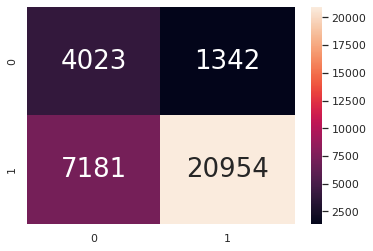

In [41]:
import seaborn as sns

print("Train confusion matrix")
conf_mat_train = pd.DataFrame(confusion_matrix(Y_train, pred_op(y_pred_train,train_threshold,train_fpr, train_tpr)), range(2),range(2))
sns.heatmap(conf_mat_train, annot=True, annot_kws={"size": 26},fmt='g')
print("                                                                         ")

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4435056601460755 for threshold 0.825


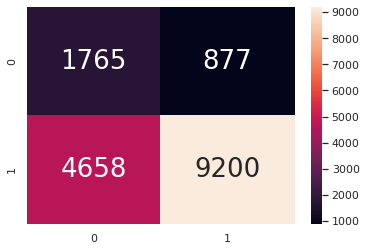

In [42]:
print("Test confusion matrix")
conf_mat_test = pd.DataFrame(confusion_matrix(Y_test, pred_op(y_pred_test,test_threshold,test_fpr, test_tpr)), range(2),range(2))
sns.heatmap(conf_mat_test, annot=True, annot_kws={"size": 26},fmt='g')

# Data Set 2

In [43]:
clf = XGBClassifier()
parameters = { 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , 'n_estimators': [5,10,50, 75, 100] }

clf = GridSearchCV(clf,  parameters,  cv=3, scoring='roc_auc',  return_train_score=True)

clf.fit(X_train_tfidf_w2v,Y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']

results = pd.DataFrame.from_dict(clf.cv_results_)


In [44]:
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100}
0.6985825632006645


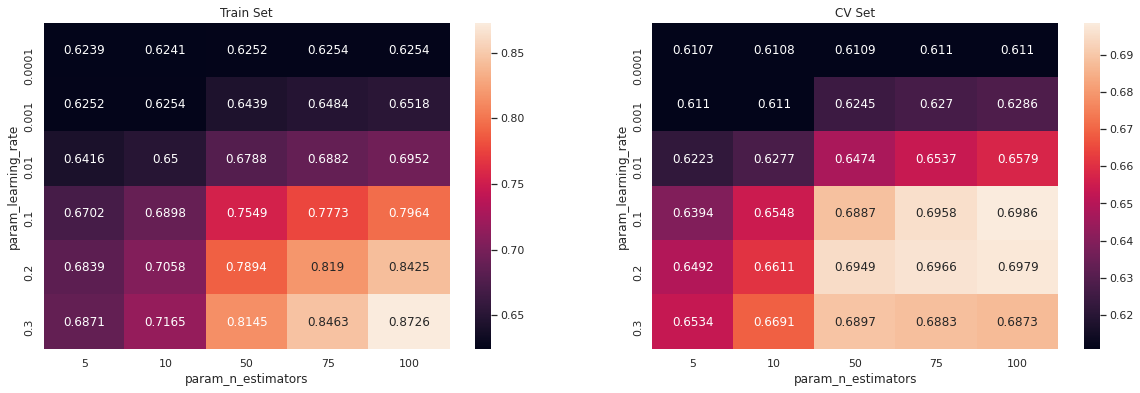

In [45]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_learning_rate','param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

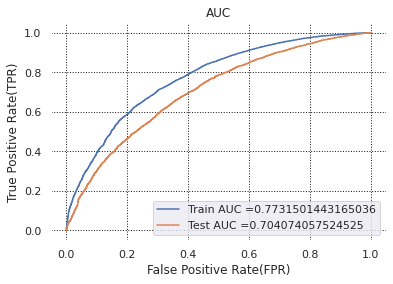

In [46]:

from sklearn.metrics import roc_curve,auc


clf1= XGBClassifier(learning_rate=0.1 ,n_estimators=100)
clf1.fit(X_train_tfidf_w2v,Y_train)

y_pred_train = clf1.predict_proba(X_train_tfidf_w2v)[ :,1]
y_pred_test = clf1.predict_proba(X_test_tfidf_w2v)[ :,1]


train_fpr, train_tpr, train_threshold = roc_curve(Y_train, y_pred_train)
test_fpr, test_tpr, test_threshold = roc_curve(Y_test, y_pred_test)

ax = plt.subplot()

auc_train2 = auc(train_fpr,train_tpr)
auc_test2 = auc(test_fpr,test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()
#print(y_pred_train)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.49548181936678287 for threshold 0.826
                                                                         


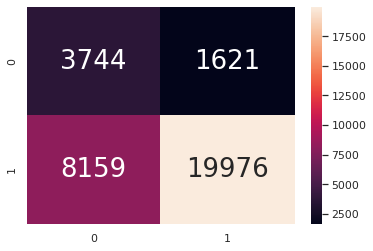

In [47]:
import seaborn as sns

print("Train confusion matrix")
conf_mat_train = pd.DataFrame(confusion_matrix(Y_train, pred_op(y_pred_train,train_threshold,train_fpr, train_tpr)), range(2),range(2))
sns.heatmap(conf_mat_train, annot=True, annot_kws={"size": 26},fmt='g')
print("                                                                         ")

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4220560242861274 for threshold 0.824


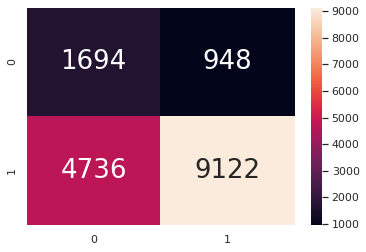

In [48]:
print("Test confusion matrix")
conf_mat_test = pd.DataFrame(confusion_matrix(Y_test, pred_op(y_pred_test,test_threshold,test_fpr, test_tpr)), range(2),range(2))
sns.heatmap(conf_mat_test, annot=True, annot_kws={"size": 26},fmt='g')

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [51]:
#Printing summary using prettytable for both vectorizers.

from prettytable import PrettyTable
summary = PrettyTable()
summary.field_names = ["Vectorizer", "Model", "learning_rate","n_estimators","Train AUC", "Test AUC"]
summary.add_row(["TF-IDF", "XGBClassifier", 0.2, 100, round(auc_train1,3),round(auc_test1,3)])
summary.add_row(["TFIDF_W2V", "XGBClassifier", 0.1, 100, round(auc_train2,3),round(auc_test2,3)])
print(summary)




+------------+---------------+---------------+--------------+-----------+----------+
| Vectorizer |     Model     | learning_rate | n_estimators | Train AUC | Test AUC |
+------------+---------------+---------------+--------------+-----------+----------+
|   TF-IDF   | XGBClassifier |      0.2      |     100      |   0.824   |  0.717   |
| TFIDF_W2V  | XGBClassifier |      0.1      |     100      |   0.773   |  0.704   |
+------------+---------------+---------------+--------------+-----------+----------+
